<a href="https://colab.research.google.com/github/AHS2020/Python_UERJ/blob/master/ArthurHenrique_e_LuizFernando_Projeto_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto 1 : Mudanças climáticas
___
#### Data de divulgação do projeto : 7/Outubro/2021
#### Prazo de entrega: 21/Outubro/2021

___
Os modelos de mudança climática são muito complexos, devem levar em consideração radiação de corpo negro, termodinámica de gases, dinámica dos oceanos e fluctuações. Em 2021 os [ganhadores do Premio Nobel de Física](https://www.nobelprize.org/prizes/physics/2021/press-release/)  Klaus Hasselmann, Syukuro Manabe e Giorgio Parisi  foram laureados pela sua contribuição à modelagem computacional e teórica do clima terrestre. 


Uma forma simplista de começar entender a dinámica da temperatura frente a regulamentações ambientais (de gases de efeito estufa, por exemplo) e da retroalimentação do sistema climático global é a seguinte equação diferencial:


$\dfrac{dC}{dt} =\dfrac{1}{10} (C - 20)(22 - C)(C - 26) - k $


onde $C$ é a temperatura em graus Celsius no equador e $k$ é uma medida das regulamentações implementadas, onde $k$ positivo é mais regulamentação e $k$ negativo é "desregulamentação". [Fonte](https://scholarship.claremont.edu/cgi/viewcontent.cgi?article=1035&context=codee) 


## Parte 1 
***(4pt)***

Usando integração  numérica (o mêtodo da sua escolha) escreva um programa que resolva a equação diferencial  para um valor de $k$ e da temperatura inicial $C_0$ arbitrários. O resultado deve ser apresentado em forma de um gráfico da evolução da temperatura no Equador em função do tempo para um intervalo de 50 anos.

Chame a sua função para fazer o gráfico para $C_0=20º \, \mathrm{C}$ e alguns valores de $k$ (p.ex. Figura abaixo).

O programa **deve utilizar funções, encapsulamento e generalização** quando possível.


_Dica: Pode chamar e utilizar os módulos `math`, `matplotlib`, `numpy` e/ou `scipy`._



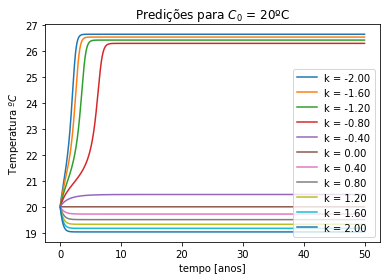

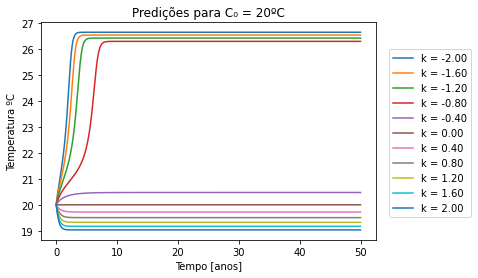

In [1]:
from scipy import integrate as it
import matplotlib.pyplot as plt
import numpy as np
import math as mt

k = [-2.00,-1.60,-1.20,-0.80,-0.40,0.00,0.40,0.80,1.20,1.60,2.00]

C_0 = [20]

def k_C (k,C_0):

  def f_f_p_t():

    t_i = 0
    t_f = 50

    dt = 0.01

    t = np.arange(t_i,t_f, dt)

    return t

  def f_f_k (k,Ci,t):

      def TEMP(C, t, k):

          y = C

          dydt = (1/10 * (y - 20) * (22 - y) * (y - 26) - k)

          return dydt

      sol = it.odeint(TEMP, Ci, t, args = (k,))

      return sol

  def plot (k,Ci):
      
    t = f_f_p_t()

    plt.title(f'Predições para C₀ = {Ci}ºC')
    plt.xlabel('Tempo [anos]')
    plt.ylabel('Temperatura ºC')

    ks = []

    for ki in k:
      C = f_f_k (ki,Ci,t)
      plt.plot(t,C)
      kx = f'k = {ki:.2f}'
      ks.append(kx)

    plt.legend(ks,bbox_to_anchor = (1.3, 0.9))
    plt.show()

  def result_1 (k,C_0):

    for Ci in C_0:
      plot (k,Ci)

  result_1 (k,C_0)

k_C(k,C_0)

## Parte 2:
***(4pt)***


Modifique o programa anterior para ser um **módulo**.

Em um novo programa, chame o módulo para obter a solução da equação diferencial para um conjunto de valores variados de $k$ e $C_0$ em uma "_rede_", isto quer dizer, percorrendo valores de  $k \in [k_{min},k_{max}]$ e $ C_0 \in [C_0^{min},C_0^{max}]$ em intervalos regulares.

A **temperatura de equilibrio** ($T_{fin}$) é aquela que se mantem relativamente estável após um certo intervalo. Para determiná-la, escreva no seu programa um algoritmo que ache este valor e o tempo necessário para chegar nele (quantitativamente). 

Obtenha o valor da temperatura de equilibrio (asintótica) para cada ponto da configuração inicial $(k,C_0)$ e analise as soluções para as diferentes configurações, por exemplo gerando graficos que mostrem a temperatura final em função de $k$ para alguns valores de $C_0$ ou qualquer outra relação relevante (justifique). 

_Dica 1: o gráfico $T_{fin}$ vs. $k$ é chamado de diagrama de bifurcação e pode ser usado para responder algumas perguntas da parte 3._

_Dica 2: pode ser usado o gráfico de dispersão `scatter` a opção `c=z` com `cmap` do matplotlib [site](https://matplotlib.org/stable/tutorials/colors/colormaps.html)._

```python
plt.scatter(x,y,c=z,cmap="rainbow")
```



 



In [2]:
# Criando módulo evolução

%%writefile evolução.py
from scipy import integrate as it
import matplotlib.pyplot as plt
import numpy as np
import math as mt

def evol():
  def k_C (k,C_0):

    def f_f_p_t():

      t_i = 0
      t_f = 50

      dt = 0.01

      t = np.arange(t_i,t_f, dt)

      return t

    def f_f_k (k, Ci, t):

        def TEMP(C, t, k):

          y = C

          dydt = (1/10 * (y - 20) * (22 - y) * (y - 26) - k)

          return dydt

        sol = it.odeint(TEMP, Ci, t, args = (k,))

        return sol

    def plot (k, Ci):
      
      t = f_f_p_t()

      plt.title(f'Predições para C₀ = {Ci}ºC')
      plt.xlabel('Tempo [anos]')
      plt.ylabel('Temperatura ºC')

      ks = []

      for ki in k:
        C = f_f_k (ki, Ci, t)
        plt.plot(t,C)
        kx = f'k = {ki}'
        ks.append(kx)

      plt.legend(ks,bbox_to_anchor = (1.3, 0.9))
      plt.show()

    def result_1 (k,C_0):

      for Ci in C_0:
        plot (k,Ci)

    result_1 (k,C_0)

  def k_C_2 (k,C_0):

    def f_f_p_t_2():

      t_i = 0
      t_f = 50

      dt = 0.01

      t = np.arange(t_i,t_f, dt)

      return t

    def f_f_k_2 (k, Ci, t):

      def TEMP(C, t, k):

          y = C

          dydt = (1/10 * (y - 20) * (22 - y) * (y - 26) - k)

          return dydt

      C = it.odeint(TEMP, Ci, t, args = (k,))

      ti = 0.00
      T = float(C[-1])

      for i in range(len(t)):

        if round(float(C[i]),2) != round(float(C[-1]),2):
          ti = float(t[i+1])
          T = float(C[i+1])

      return ti, T

    def plot_2 (k, Ci):
      
      t = f_f_p_t_2 ()

      t2 = []
      C2 = []

      for ki in k:
          t2i,C2i = f_f_k_2 (ki, Ci, t)
          t2.append(t2i)
          C2.append(C2i)

      plt.title(f'Diagrama de bifurcação para C₀ = {Ci}ºC')
      plt.xlabel('k')
      plt.ylabel('Temperatura Final ºC')

      kz = []

      for i in range(len(t2)):
          ky = f'Para k = {k[i]} a Tₘₐₓ = {C2[i]:.2f} ºC em {t2[i]:.2f} anos'
          kz.append(ky)
          plt.scatter(k[i], C2[i])

      plt.legend(kz,bbox_to_anchor = (1.85, 0.9))
      plt.show()

    def result_2 (k,C_0):

      for Ci in C_0:
          plot_2 (k,Ci)

    result_2 (k,C_0)

  def k_C_3 (k,C_0):
    def f_f_p_t_3 ():

      t_i = 0
      t_f = 50

      dt = 0.01

      t = np.arange(t_i,t_f, dt)

      return t

    def f_f_k_3 (k, Ci, t):

      def TEMP(C, t, k):

          y = C

          dydt = (1/10 * (y - 20) * (22 - y) * (y - 26) - k)

          return dydt

      C = it.odeint(TEMP, Ci, t, args = (k,))

      T = float(C[-1])

      return  T

    def f_f_C_0 (k, Ci):
      
      t = f_f_p_t_3 ()

      C2 = []

      for ki in k:
          C2i = f_f_k_3 (ki, Ci, t)
          C2.append(C2i)

      return C2

    def plot_3 (k, C_0):
                
      plt.title(f'Diagrama de bifurcação geral')
      plt.xlabel('k')
      plt.ylabel('Temperatura Final ºC')

      for Ci in C_0:
        C2 = f_f_C_0 (k,Ci)
        plt.scatter(k, C2,color='darkgrey')

      plt.show()

    plot_3 (k,C_0)

  try:
    k_min = float(input('Introduza o k mínimo: '))
  except:
    print(' ')
    print('Houve um erro na digitação, tente novamente')
    print(' ')
    try:
      k_min = float(input('Introduza o k mínimo: '))
    except:
      print(' ')  
      print('Houve um erro na digitação, para tentar novamente reinicie o programa.')
      return

  print(' ') 

  try:
    k_max = float(input('Introduza o k máximo: '))
  except:
    print(' ')
    print('Houve um erro na digitação, tente novamente')
    print(' ')
    try:
      k_max = float(input('Introduza o k máximo: '))
    except:
      print(' ')  
      print('Houve um erro na digitação, para tentar novamente reinicie o programa.')
      return

  print(' ')

  if k_max < k_min:
    print('k máximo é maior que o k mínimo, o programa será reiniciado.')
    return
  
  try:
    dk = float(input('Introduza o tamanho do intervalo entre os \nvalores de k consecutivos: '))
  except:
    print(' ')
    print('Houve um erro na digitação, tente novamente')
    print(' ')
    try:
      dk = float(input('Introduza o tamanho do intervalo entre os \nvalores de k consecutivos: '))
    except:
      print(' ')  
      print('Houve um erro na digitação, para tentar novamente reinicie o programa.')
      return
  
  print(' ')

  if dk > (k_max - k_min):
    print("O intervalo fornecido é maior que a diferença entre os k's fornecidos, \npara tentar novamente reinicie o programa.")
    return

  k = []

  k.append(k_min)

  count1 = 0

  while k[count1] < k_max:
    k_min = k_min + dk
    k.append(round(k_min,3))
    count1 = count1 + 1

  try:
    C_min = float(input('Introduza a temperatura inicial mínima: '))
  except:
    print(' ')
    print('Houve um erro na digitação, tente novamente')
    print(' ')
    try:
      C_min = float(input('Introduza a temperatura inicial mínima: '))
    except:
      print(' ')  
      print('Houve um erro na digitação, para tentar novamente reinicie o programa.')
      return

  print(' ') 

  try:
    C_max = float(input('Introduza a temperatura inicial máxima: '))
  except:
    print(' ')
    print('Houve um erro na digitação, tente novamente')
    print(' ')
    try:
      C_max = float(input('Introduza a temperatura inicial máxima: '))
    except:
      print(' ')  
      print('Houve um erro na digitação, para tentar novamente reinicie o programa.')
      return

  print(' ')

  if C_max < C_min:
    print('T máximo é maior que o T mínimo, o programa será reiniciado.')
    return
  
  try:
    dC = float(input('Introduza o tamanho do intervalo entre duas \ntemperaturas iniciais consecutivas: '))
  except:
    print(' ')
    print('Houve um erro na digitação, tente novamente')
    print(' ')
    try:
      dC = float(input('Introduza o tamanho do intervalo entre duas \ntemperaturas iniciais consecutivas: '))
    except:
      print(' ')  
      print('Houve um erro na digitação, para tentar novamente reinicie o programa.')
      return
  
  print(' ')

  if dC > (C_max - C_min):
    print("O intervalo fornecido é maior que a diferença entre os T's fornecidos, \npara tentar novamente reinicie o programa.")
    return

  C = []

  C.append(C_min)

  count2 = 0

  while C[count2] < C_max:
    C_min = C_min + dC
    C.append(round(C_min,2))
    count2 = count2 + 1

  print(' ')

  print('Reponda com S ou N')

  print(' ')

  x = input('Você gostaria de ver o(s) gráfico(s) de Temperatura X Tempo \npara a(s) Tempemperatura(s) inicial(is)? ')

  print(' ')

  if x == 'S' or x == 's':
    k_C (k,C)
  elif x == 'N' or x == 'n':
    print('Você não selecionou o gráfico de Temperatura X Tempo.')
  else:
    print('Você digitou algo incompatível com o pedido, mas terá uma nova chance.')
    print(' ')
    x = input('Você gostaria de ver o(s) gráfico(s) de Temperatura X Tempo \npara a(s) Tempemperatura(s) inicial(is)? ')
    print(' ')
    if x == 'S' or x == 's':
      k_C (k,C)
    elif x == 'N' or x == 'n':
      print('Você não selecionou o gráfico de Temperatura X Tempo')
    else:
      print('Você digitou algo incompatível com o pedido e não terá mais chances de retornar, \nse quiser o(s) gráfico(s) Temperatura X Tempo reinicie o programa.')

  print(' ')

  y = input('Você gostaria de ver o(s) gráfico(s) de bifurcação \npara a(s) Tempemperatura(s) inicial(is)? ')

  print(' ')

  if y == 'S' or y == 's':
    k_C_2 (k,C)
  elif y == 'N' or y == 'n':
    print('Você não selecionou o(s) gráfico(s) de bifurcação para cada temperatura.')
  else:
    print('Você digitou algo incompatível com o pedido, mas terá uma nova chance.')
    print(' ')
    y = input('Você gostaria de ver o(s) gráfico(s) de bifurcação \npara a(s) Tempemperatura(s) inicial(is)? ')
    print(' ')
    if y == 'S' or y == 's':
      k_C_2 (k,C)
    elif y == 'N' or y == 'n':
      print('Você não selecionou o(s) gráfico(s) de bifurcação para cada temperatura.')
    else:
      print('Você digitou algo incompatível com o pedido e não terá mais chances de retornar, \nse quiser o(s) gráfico(s) de bifurcação para cada temperatura reinicie o programa.')
  
  print(' ')

  z = input('Você gostaria de ver o(s) gráfico(s) de bifuracação geral? ')

  print(' ')

  if z == 'S' or z == 's':
    k_C_3 (k,C)
  elif z == 'N' or z == 'n':
    print('Você não selecionou o gráfico de bifurcação geral.')
  else:
    print('Você digitou algo incompatível com o pedido, mas terá uma nova chance.')
    print(' ')
    z = input('Você gostaria de ver o(s) gráfico(s) de bifuracação geral? ')
    print(' ')
    if z == 'S' or z == 's':
      k_C_3 (k,C)
    elif z == 'N' or z == 'n':
      print('Você não selecionou o gráfico de bifurcação geral.')
    else:
      print('Você digitou algo incompatível com o pedido e não terá mais chances de retornar, \nse quiser o gráfico de bifurcação geral reinicie o programa.')


Overwriting evolução.py


Introduza o k mínimo: -2
 
Introduza o k máximo: 2
 
Introduza o tamanho do intervalo entre os 
valores de k consecutivos: 0.4
 
Introduza a temperatura inicial mínima: 18
 
Introduza a temperatura inicial máxima: 22
 
Introduza o tamanho do intervalo entre duas 
temperaturas iniciais consecutivas: 2
 
 
Reponda com S ou N
 
Você gostaria de ver o(s) gráfico(s) de Temperatura X Tempo 
para a(s) Tempemperatura(s) inicial(is)? s
 


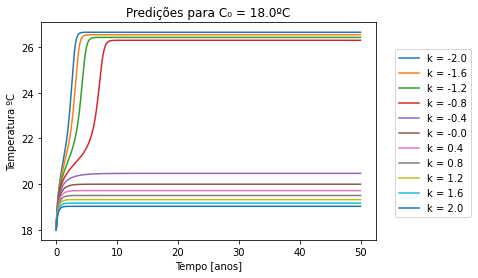

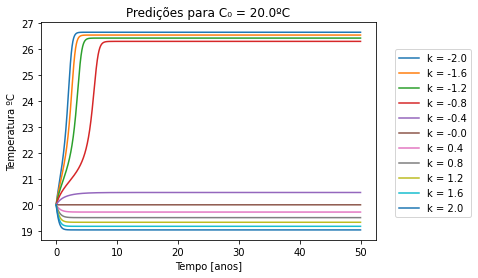

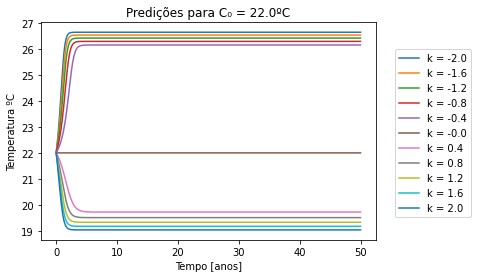

 
Você gostaria de ver o(s) gráfico(s) de bifurcação 
para a(s) Tempemperatura(s) inicial(is)? s
 


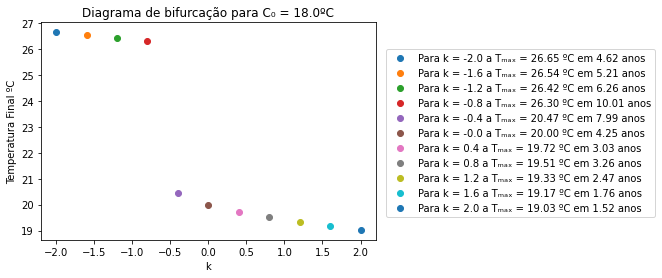

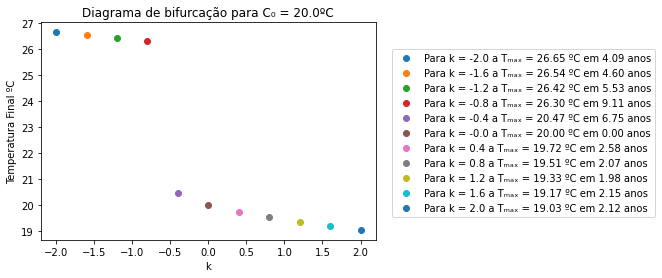

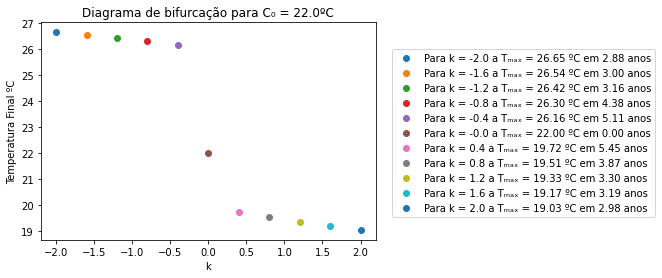

 
Você gostaria de ver o(s) gráfico(s) de bifuracação geral? s
 


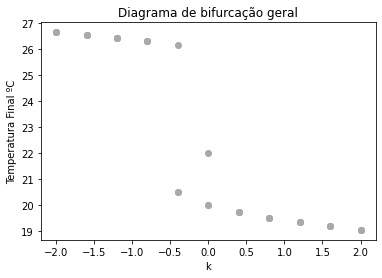

In [3]:
import evolução as ev
ev.evol()

## Parte 3:

***(2pt)***


Responda as perguntas,  apresentando cálculos ou gráficos para justificar as suas respostas.


Introduza o k mínimo: -2
 
Introduza o k máximo: 3
 
Introduza o tamanho do intervalo entre os 
valores de k consecutivos: 0.01
 
Introduza a temperatura inicial mínima: 10
 
Introduza a temperatura inicial máxima: 30
 
Introduza o tamanho do intervalo entre duas 
temperaturas iniciais consecutivas: 0.5
 
 
Reponda com S ou N
 
Você gostaria de ver o(s) gráfico(s) de Temperatura X Tempo 
para a(s) Tempemperatura(s) inicial(is)? N
 
Você não selecionou o gráfico de Temperatura X Tempo.
 
Você gostaria de ver o(s) gráfico(s) de bifurcação 
para a(s) Tempemperatura(s) inicial(is)? N
 
Você não selecionou o(s) gráfico(s) de bifurcação para cada temperatura.
 
Você gostaria de ver o(s) gráfico(s) de bifuracação geral? S
 


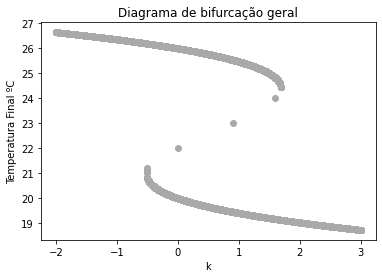

In [4]:
import evolução as ev
ev.evol()

1. O que acontece com a temperatura de estabilização se a _desregularização_  $k$ (negativo) for menor que $\sim -0.6$ ?

> Se k for menor que -0.6 a temperatura de estabilização aumentará conforme o k diminui.



2. O que acontece com a temperatura de estabilização se a _regularização_ $k$ (positivo) for maior que $\sim 1.8 $ ?



> Se k for maior que 1.8 a temperatura de estabilização diminuirá conforme o k aumenta.

Introduza o k mínimo: 0
 
Introduza o k máximo: 0
 
Introduza o tamanho do intervalo entre os 
valores de k consecutivos: 0
 
Introduza a temperatura inicial mínima: 22
 
Introduza a temperatura inicial máxima: 22.1
 
Introduza o tamanho do intervalo entre duas 
temperaturas iniciais consecutivas: 0.1
 
 
Reponda com S ou N
 
Você gostaria de ver o(s) gráfico(s) de Temperatura X Tempo 
para a(s) Tempemperatura(s) inicial(is)? S
 


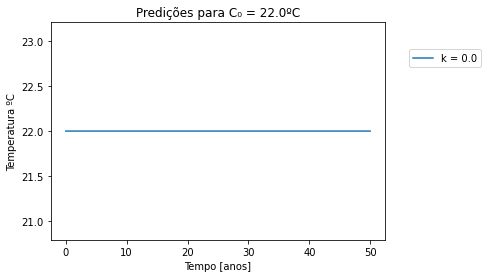

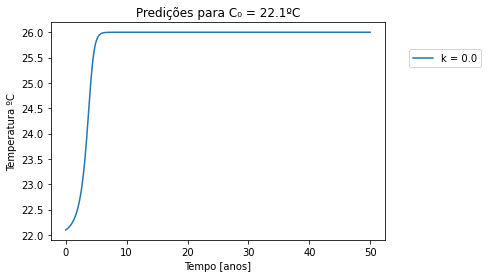

 
Você gostaria de ver o(s) gráfico(s) de bifurcação 
para a(s) Tempemperatura(s) inicial(is)? S
 


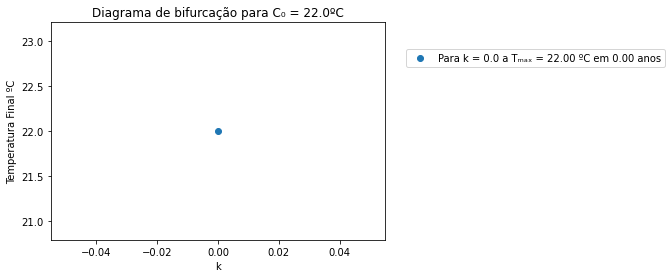

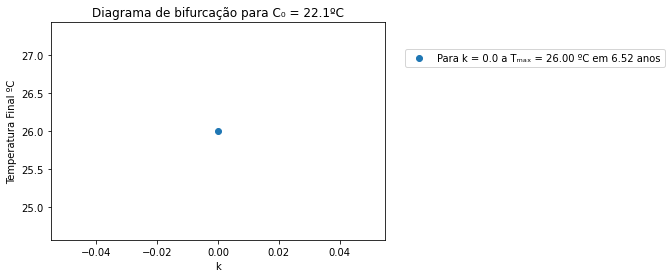

 
Você gostaria de ver o(s) gráfico(s) de bifuracação geral? N
 
Você não selecionou o gráfico de bifurcação geral.


In [5]:
import evolução as ev
ev.evol()

3. Se $k$ for mantido em 0, o que acontece com a temperatura final para um valor de temperatura inicial $C_0 = 22ºC$ ?  e se este valor flutuar em 0.1º para cima?



> Com k = 0, tem-se que com $C_0 = 22ºC$ a temperatura se mantem constante ao longo dos anos, ou seja, $T_{fin} = C_0$. Já para $C_0 = 22.1ºC$, há um aumento da temperatura com o decorrer do tempo, atingindo a $T_{fin} = 26ºC$ em 6.52 anos.

4. Modifique seu programa para simular a seguinte situação, começamos com uma temperatura de $21ºC$ e $k=-0.5$, depois de 5 anos a regulamentação e relaxada ainda mais, com $k=-0.6$.


   

[21.] [22.2880913] [22.2880913]
k = 0.24468129623721166


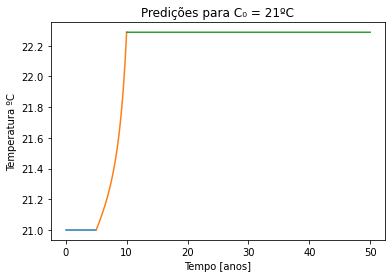

In [6]:
from scipy import integrate as it
import matplotlib.pyplot as plt
import numpy as np
import math as mt

k = [-0.50, -0.60, 0.24468129623721166]

C_0 = [21]

def k_C (k, C_0):

    def f_f_p_t():

      t_1 = 0
      t_2 = 5
      t_3 = 10
      t_4 = 50

      dt = 0.01

      t1 = np.arange(t_1,t_2, dt)

      t2 = np.arange(t_2,t_3, dt)

      t3 = np.arange(t_3,t_4, dt)

      return t1, t2, t3

    def f_f_k (k, Ci, t1, t2, t3):
      
        k1 = k[0]
        k2 = k[1]
        k3 = k[2]

        def TEMP1(C, t, k):

          y = C

          dydt = (1/10 * (y - 20) * (22 - y) * (y - 26) - k)

          return dydt
        def TEMP2(C, t, k):

          y = C

          dydt = (1/10 * (y - 20) * (22 - y) * (y - 26) - k)

          return dydt
        def TEMP3(C, t, k):

          y = C

          dydt = (1/10 * (y - 20) * (22 - y) * (y - 26) - k)

          return dydt

        sol1 = it.odeint(TEMP1, Ci, t1, args = (k1,))

        sol2 = it.odeint(TEMP2, sol1[-1], t2, args = (k2,))

        sol3 = it.odeint(TEMP3, sol2[-1], t3, args = (k3,))

        return sol1, sol2, sol3

    def plot (k,Ci):
      
      t1, t2, t3 = f_f_p_t()

      plt.title(f'Predições para C₀ = {Ci}ºC')
      plt.xlabel('Tempo [anos]')
      plt.ylabel('Temperatura ºC')

      C1, C2, C3 = f_f_k (k, Ci, t1, t2, t3)
      print(C1[-1],C2[-1],C3[-1])
      y = float(C2[-1])
      k = 1/10 * (y - 20) * (22 - y) * (y - 26)
      print(f'k = {k}')

      plt.plot(t1,C1)
      plt.plot(t2,C2)
      plt.plot(t3,C3)
      plt.show()

    def result_1 (k,C_0):

      for Ci in C_0:
        plot (k,Ci)

    result_1 (k,C_0)

k_C(k,C_0)

>   a) Qual a temperatura no Equador no momento da transição de $k=-0.5$ a $k=-0.6$?

> A temperatura no Equador no momento da transição de $k=-0.5$ a $k=-0.6$ é de 21ºC.



> b) Qual a tendência  da temperatura (ou seja, desce ou sobe) 5 anos após a mudança?





   


> 5 anos após a mudança a temperatura sobe.




> c) Qual o valor mínimo de $k$ a partir desse momento (10 anos após o começo) para que a temperatura do Equador não aumente nos próximos 50 anos?





> Para que a temperatura do Equador não aumente nos próximos 50 anos o valor de k a partir dos 10 anos deve ser:

> k $\geq$ 0.24468129623721166.


